Причастные к созданию;

Шкобин   Ю.Г. (M01-902)

Черноног В.В. (M01-906)

Трусов   А.В  (M01-901)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

csfont = {'fontname':'Helvetica'}
plt.rcParams["figure.figsize"] = [16,9]
import warnings
warnings.filterwarnings('ignore')

In [2]:
def drawGraph(x,func,xlabel="", ylabel="",**arg):
    plt.plot(x, func(x,**arg))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel(xlabel,fontsize=20,labelpad=-200,rotation=0)
    plt.xlabel(ylabel,fontsize=20,labelpad=-145,rotation=0)
    plt.show()

In [3]:
def drawGraphAbs(x,func,xlabel="", ylabel="",ylim=(0,1),**arg):
    fx = func(x,**arg)
    plt.plot(x, fx)
    plt.xlim(x[0],x[-1])
    plt.ylim(ylim)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.annotate(ylabel, xy=(0.2, ylim[1]),size=20)
    plt.annotate(xlabel, xy=(np.max(x),0),size=20)
    plt.show()

In [4]:
def drawGraph3D(z,func,limits=1,xlabel="", ylabel="",zlabel ="",**arg):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    xy = func(z,**arg)
    x= np.real(xy)
    y = np.imag(xy)
    ax.plot(xs=x,ys=y,zs=z)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_zlabel(zlabel, fontsize=13)
    ax.set_xlim(-limits,limits)
    ax.set_ylim(-limits,limits)
    plt.show()

## Задача N1

На входе широкополосный сигнал

$f_д = 60 кГц$

ФНЧ Баттерворта с $n = 4, f_0 =15кГц$

Найти:

1) $|X(f)|$

2) уровень сигнала -?
   уровень искажений от наложений -?
   при $f = 15кГц$ и $\dfrac{f_д}{2}$
   
3) $f_{д_{min}}$ - ?

Изобразим модуль спектра широкополосного сигнала после фильтра

In [5]:
def butter(nu,fd = 0, n = 4,copies=0): # n -- порядок фильтра 
    return np.sqrt(1./(nu**(2.* n) + 1.))
def wide_1(nu): 
    tmp = [1]*len(nu);
    return tmp

def butter_f(f, fc, n = 4):
    return butter(f/fc, n)

In [6]:
_ =interact(drawGraphAbs,
         xlabel=fixed("$\dfrac{f}{f_c}$"),
         ylabel=fixed("$|X(f)|$"),
         x=fixed(np.linspace(-3,3,10000)),
         func=fixed(butter),
         ylim=fixed((0,1)),
         n = widgets.IntSlider(value=4,
                                   min=1,
                                   max=10,
                               step=1))


interactive(children=(IntSlider(value=4, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

Модуль спектра сигнала перед фильтром:

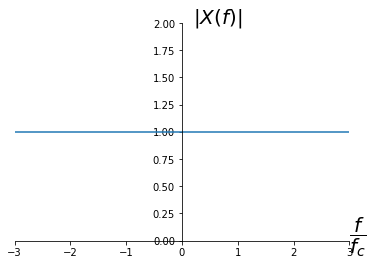

In [7]:
plt.plot(np.linspace(-3,3,1000), [1]*1000)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('data',0.0))
plt.xlim(-3,3)
plt.ylim(0,2)
xlabel="$\dfrac{f}{f_c}$"
ylabel="$|X(f)|$"
plt.annotate(ylabel, xy=(0.2, 2),size=20)
plt.annotate(xlabel, xy=(3,0),size=20)
plt.show()

Изобразим сигнал после дискретизации

In [8]:
def drawGraphAbs1(x,func,func2,func3,func4, xlabel="", ylabel="",ylim=(0,1),**arg):
    fx = func(x,**arg)
    fx2 = func2(x,**arg)
    fx3 = func3(x,**arg)
    fx4 = func4(x,**arg)
    plt.plot(x, fx)
    plt.plot(x, fx2,color="red",alpha=0.6)
    plt.plot(x, fx3,color="red",alpha=0.6)
    plt.plot(x, fx4,color="red",alpha=0.6)
    plt.xlim(x[0],x[-1])
    plt.ylim(ylim)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.annotate(ylabel, xy=(0.2, ylim[1]),size=20)
    plt.annotate(xlabel, xy=(np.max(x),0),size=20)
    plt.show()

In [9]:
def butterr(nu,fd = 0, n = 4,copies=0): # n -- порядок фильтра 
    return np.sqrt(1./((nu-fd)**(2.* n) + 1.))
def butterl(nu,fd = 0, n = 4,copies=0): # n -- порядок фильтра 
    return np.sqrt(1./((nu+fd)**(2.* n) + 1.))

In [10]:
def butter_1_1(nu,fd = 3, n = 4,copies=10): # n -- порядок фильтра 
    tmp = np.sqrt(1./((nu)**(2.* n) + 1.))
    for i in range(1,copies,1):
        tmp = tmp + np.sqrt(1./((nu+i*fd)**(2.* n) + 1.))
        tmp = tmp + np.sqrt(1./((nu-i*fd)**(2.* n) + 1.))
    return tmp

_ =interact(drawGraphAbs1,
         xlabel=fixed("$\dfrac{f}{f_c}$"),
         ylabel=fixed("$|X(f)|$"),
         x=fixed(np.linspace(-5,5,10000)),
         ylim =fixed((0,1.5)),
         func=fixed(butter_1_1),
         func2=fixed(butter),
         func3=fixed(butterr),
         func4=fixed(butterl),   
         n = widgets.IntSlider(value=4,
                                   min=2,
                                   max=5,
                               step=1),
         fd = widgets.FloatSlider(value=4,
                                   min=1,
                                   max=7,
                               step=0.1),
           copies = widgets.IntSlider(value=10,
                                   min=1,
                                   max=20,
                               step=1))

interactive(children=(IntSlider(value=4, description='n', max=5, min=2), FloatSlider(value=4.0, description='f…

In [11]:
def drawGraphAbs2(x,func,func2,xlabel="", ylabel="",ylim=(0,1),**arg):
    t2 = func2
    fx = func(x,**arg)
    fx2 = func2(x,**arg)
    plt.plot(x, fx)
    plt.plot(x, fx2,color='red')
    plt.xlim(x[0],x[-1])
    plt.ylim(ylim)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    plt.annotate(ylabel, xy=(0.2, ylim[1]),size=20)
    plt.annotate(xlabel, xy=(np.max(x),0),size=20)
    plt.show()

Изобразим спектр сигнала на выходе Устройства выборки и хранения

In [12]:
def butter_1_2(nu,fd = 3, n = 4,copies=10): # n -- порядок фильтра 
    tmp = np.sqrt(1./((nu)**(2.* n) + 1.))
    for i in range(1,copies,1):
        tmp = tmp + np.sqrt(1./((nu+i*fd)**(2.* n) + 1.))
        tmp = tmp + np.sqrt(1./((nu-i*fd)**(2.* n) + 1.))
    uvh = np.sin(np.pi * nu/fd)/ (np.pi * nu/fd)
    for i in range(1,copies,1):
        uvh = uvh + np.sin(np.pi * (nu + 2*i*fd)/fd)/ (np.pi * (nu+ 2*i*fd)/fd)
        uvh = uvh + np.sin(np.pi * (nu - 2*i*fd)/fd)/ (np.pi * (nu- 2*i*fd)/fd)
    return tmp*uvh
def uvh(nu,fd = 3, n = 4,copies=10):
    uvh = np.sin(np.pi * nu/fd)/ (np.pi * nu/fd)
    for i in range(1,copies,1):
        uvh = uvh + np.sin(np.pi * (nu + 2*i*fd)/fd)/ (np.pi * (nu+ 2*i*fd)/fd)
        uvh = uvh + np.sin(np.pi * (nu - 2*i*fd)/fd)/ (np.pi * (nu- 2*i*fd)/fd)
    return uvh

_ =interact(drawGraphAbs2,
         xlabel=fixed("$\dfrac{f}{f_c}$"),
         ylabel=fixed("$|X(f)|$"),
         x=fixed(np.linspace(-5,5,10000)),
         ylim =fixed((0,1.5)),
         func=fixed(butter_1_2),
         func2=fixed(uvh),
         n = widgets.IntSlider(value=4,
                                   min=2,
                                   max=5,
                               step=1),
         fd = widgets.IntSlider(value=4,
                                   min=1,
                                   max=7,
                               step=1),
           copies = widgets.IntSlider(value=10,
                                   min=1,
                                   max=20,
                               step=1))

interactive(children=(IntSlider(value=4, description='n', max=5, min=2), IntSlider(value=4, description='fd', …

#### Найдем требуемы уровни сигнала

$|H(f)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{f}{f_c} \right)^{2n} }} = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{f}{f_c} \right)^{8} }} $

$|H(15кГц)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{15}{15} \right)^{8} }} =  \dfrac{1}{\sqrt{2}} \approx 0,7071 (-3 Дб) $

$|H(30кГц)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{30}{15} \right)^{8} }} =  \dfrac{1}{\sqrt{257}} \approx 0,062 (-24 Дб) $

#### Найдем требуемые уровни искажения от наложения

$|H_k(f)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{f - f_д}{f_c} \right)^{2n} }} = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{f - f_д}{f_c} \right)^{8} }} $

$|H_k(15кГц)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{15 - 60}{15} \right)^{8} }} =\dfrac{1}{\sqrt{6562}} \approx 0,01234(-38Дб)  $ 

$|H_k(30кГц)| = \sqrt{\dfrac{\vphantom{I}1}{1 + \left(\dfrac{30 - 60}{15} \right)^{8} }} =\dfrac{1}{\sqrt{257}} \approx 0,0628(-24Дб)  $ 

Уровень сигнала и уровень искажений от наложения совпадают на частоте Найквиста

Запишем требование на $f_д$

$|H(15кГц)| \ge 10 |H_k(15кГц)| $

$\sqrt{\frac{\vphantom{I}1}{1 + \left(\dfrac{f}{f_c} \right)^{8} }}
\ge
\sqrt{\frac{\vphantom{I}1}{1 + \left(\dfrac{f - f_д}{f_c} \right)^{8} }}
$


$\dfrac{1}{200}
\ge
\sqrt{\frac{\vphantom{I}1}{1 + \left(1 -\dfrac{f_д}{f_c} \right)^{8} }}$

$
\sqrt[8]{199} \le  \left| 1 - \dfrac{f_д}{f_c}\right|
$

$ f_д \ge ( 1 + \sqrt[8]{199})f_с$

$f_{д_{min}} = (1 + \sqrt[8]{199})f_c \approx 44,07 кГц$

# Задача №2


Дано

$f_c = 20Мгц$

$В = 5Мгц$

$f_{д_1} = 22,5Мгц$

$f_{д_2} = 17,5Мгц$

$f_{д_3} = 15Мгц$

$f_{д_4} = 11,2Мгц$

$f_{д_5} = 7,5Мгц$

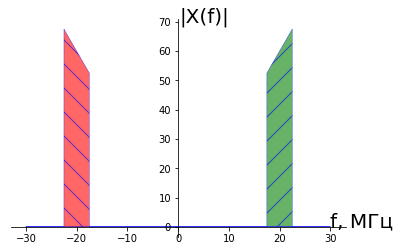

In [13]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def fup(x):
    y = 3*(x+20)
    return y* ( (x-2.5) < 0 ) * ((x+2.5) >0 )

x = np.linspace(-30, 30, 10000)

plt.fill_between(x, fup(x-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
plt.fill_between(x, fup(-x-20),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
#plt.fill_between(x, fup(-x), step='mid',hatch="\\")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate("|X(f)|", xy=(0.2, 70),size=20)
plt.annotate("f, МГц", xy=(np.max(x),0),size=20)
plt.show()

Найти

$|X_д(f)|$

обосновать выбор $f_{д_{min}}$



Считаем, что исходный непрерывный чигннал действительный => модуль спектра четный

$f_c$ находится посередине спектра

Известно, что спектр размножается с частотой f_д при дискретизации
Тогда изобразим спектры

In [14]:
def drawGraph3(x,fd,**arg):
    plt.fill_between(x, fup(x-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
    plt.fill_between(x, fup(-x-20),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
    for i in range(1,10,1):
        plt.fill_between(x, fup(x+i*fd-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
        plt.fill_between(x, fup(-x-20+i*fd),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
        plt.fill_between(x, fup(x-i*fd-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
        plt.fill_between(x, fup(-x-20-i*fd),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data',0.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.annotate("|X(f)|", xy=(0.2, 70),size=20)
    plt.annotate("f,МГц", xy=(np.max(x),0),size=20)
    plt.show()
    
    



In [15]:
_ =interact(drawGraph3,
         x=fixed(np.linspace(-30, 30, 10000)),
         fd = widgets.FloatSlider(value=22.5,
                                   min=5,
                                   max=30,
                               step=0.05,continuous_update=False))

interactive(children=(FloatSlider(value=22.5, continuous_update=False, description='fd', max=30.0, min=5.0, st…

Т.к сигнал полосовой, то можно можно прибегнуть к субдискретизации

тогда известно

$f_д > \dfrac{2f_c + B}{m+1}$

где
$m \in \mathbb{Z} $

$m < \dfrac{2f_c - \dfrac{B}{2}}{B} = 3.5$

Значит $m_{max} = 3$

$f_{д_{min}} = \dfrac{9}{4}B = 11,25 Мгц$

# Задача №3


Инверсия спектрна при дискретизации полос сигналов

Спектр инвертируется при $(-1)^k$

Решение:

При Дискретизации сигналов возникает понятие основного спектра (первая зона Найквиста)  - это часть спектра дискретизованного сигнала в диапазоне $\left[-\dfrac{f_д}{2}; \dfrac{f_д}{2} \right]$

В случае дискретизации действительный полосовых сигналов возникает понятие инверсии спектра. Как известно, спектр действительного сигнала обладает свойством 

$X(f) = X^*(-f)$

а модкль спектра будет честной функцией, то етсь наблюдается симметрия для $X_{-}(f)$ и $X_{+}(f)$

Инверсией спектра называется ситуация, когда при дискретезации действительного полосового сигнала поведение основного спектри при положительных частотах совпадает с поведением исходного спектра при отрицательных частотах

#### в номере 2 инверсия наблюдается для $f_д = $ 22,5 Мгц и 11,25Мгц

Так как частоты ДПФ с точностью до постоянного множителя являются значениями ДВПФ в дискретном наборе точек, то покажем инвертирование спектра ДВПФ действительной последовательности при домножении отсчетов на $(-1)^k$

$(-1)^k = e^{j\pi k}$

$x(k) \leftrightarrow X(\nu)$

$\sum\limits_{k=-\infty}^{\infty}x(k)e^{j\pi k}e^{-j2\pi\nu k} 
=\sum\limits_{k=-\infty}^{\infty}x(k)e^{-j2\pi\left(\nu-\dfrac{1}{2}\right) k}
= X\left(\nu -\dfrac{1}{2}\right) $

то есть исходный спектр сдвинулся на $\dfrac{f_д}{2} \left(\nu = \dfrac{1}{2}\right)$

Далее вспоминаем, что ДВПФ спектр - периодическая функция с периодом $f_д$ а спектр действительного сигнала - комплексно четная функция

Значит, часть основного спектра с положительными частотами поменялась местами с частью отрицательных частот

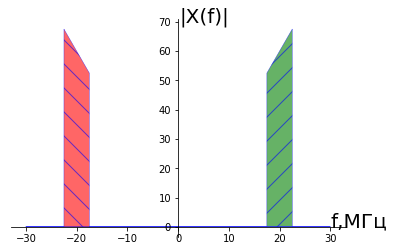

In [16]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def fup(x):
    y = 3*(x+20)
    return y* ( (x-2.5) < 0 ) * ((x+2.5) >0 )

x = np.linspace(-30, 30, 10000)

plt.fill_between(x, fup(x-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
plt.fill_between(x, fup(-x-20),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
#plt.fill_between(x, fup(-x), step='mid',hatch="\\")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate("|X(f)|", xy=(0.2, 70),size=20)
plt.annotate("f,МГц", xy=(np.max(x),0),size=20)
plt.show()

In [17]:
def drawGraph4(x,switch,**arg):
    fd =15.5
    if switch:
        plt.fill_between(x, fup(x-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
        plt.fill_between(x, fup(-x-20),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
        for i in range(1,10,1):
            plt.fill_between(x, fup(x+i*fd-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
            plt.fill_between(x, fup(-x-20+i*fd),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
            plt.fill_between(x, fup(x-i*fd-20),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
            plt.fill_between(x, fup(-x-20-i*fd),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
    else:
        plt.fill_between(x, fup(x-20+fd/2),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
        plt.fill_between(x, fup(-x-20-fd/2),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
        for i in range(1,10,1):
            plt.fill_between(x, fup(x+i*fd-20+fd/2),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
            plt.fill_between(x, fup(-x-20+i*fd-fd/2),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
            plt.fill_between(x, fup(x-i*fd-20+fd/2),hatch="/", edgecolor="b", linewidth=0.5,facecolor="green",alpha =0.6)
            plt.fill_between(x, fup(-x-20-i*fd-fd/2),hatch="\\", edgecolor="b", linewidth=0.5,facecolor="red",alpha =0.6)
            pass
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data',0.0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.annotate("|X(f)|", xy=(0.2, 70),size=20)
    plt.annotate("f,МГц", xy=(np.max(x),0),size=20)
    plt.show()
    
    

Можем пронаблюдать инверсию спектра

In [18]:
_ =interact(drawGraph4,
         x=fixed(np.linspace(-30, 30, 10000)),
         switch = widgets.IntSlider(value=0,
                                   min=0,
                                   max=1,
                               step=1))

interactive(children=(IntSlider(value=0, description='switch', max=1), Output()), _dom_classes=('widget-intera…